In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot

In [143]:
df = pd.read_csv('FastagFraudDetection.csv')

In [144]:
df.head()

Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292             65           KA11AB1234   
1  13.059816123454882, 77.77068662374292             78           KA66CD5678   
2  13.059816123454882, 77.77068662374292             53           KA88EF9012   
3  13.059816123454882, 77.77068662374292             92           KA11GH3456   
4  13.059816123454882, 77.77068662374292             60           KA44IJ6789   

  Fraud_indicator  
0           Fraud  
1           Fraud  
2       Not Fraud  
3           Fraud  
4           Fraud

In [145]:
df.shape

(5000, 13)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [147]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [148]:
df.Vehicle_Type.value_counts()

Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: Vehicle_Type, dtype: int64

In [149]:
df.Vehicle_Type.unique()

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

In [150]:
df.Lane_Type.value_counts()

Regular    2858
Express    2142
Name: Lane_Type, dtype: int64

In [151]:
df.Lane_Type.unique()

array(['Express', 'Regular'], dtype=object)

In [152]:
df.Vehicle_Dimensions.value_counts()

Large     2144
Small     1428
Medium    1428
Name: Vehicle_Dimensions, dtype: int64

In [153]:
df.Vehicle_Dimensions.unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [154]:
df.TollBoothID.unique()

array(['A-101', 'B-102', 'D-104', 'C-103', 'D-105', 'D-106'], dtype=object)

In [155]:
df.TollBoothID.value_counts()

B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: TollBoothID, dtype: int64

In [156]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [157]:

df.duplicated().sum()

0

In [193]:
df.describe()

Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed  \
count     5000.000000          5000.00000  5000.000000    5000.000000   
mean      2500.500000           161.06200   141.261000      67.851200   
std       1443.520003           112.44995   106.480996      16.597547   
min          1.000000             0.00000     0.000000      10.000000   
25%       1250.750000           100.00000    90.000000      54.000000   
50%       2500.500000           130.00000   120.000000      67.000000   
75%       3750.250000           290.00000   160.000000      82.000000   
max       5000.000000           350.00000   350.000000     118.000000   

              Hour  Payment_Discrepancy  
count  5000.000000          5000.000000  
mean     11.552800            19.801000  
std       6.817427            56.097547  
min       0.000000           -80.000000  
25%       6.000000             0.000000  
50%      12.000000             0.000000  
75%      17.000000             0.000000  
max      23.000000           290.000000

Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Deepesh\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.10  |           py39_2          68 KB
    anaconda-custom            |           py39_3          43 KB
    anaconda-anon-usage-0.4.4  |   py39h8ddfbff_0          27 KB
    anaconda-navigator-2.4.3   |   py39haa95532_0         5.5 MB
    ca-certificates-2024.6.2   |       h56e8100_0         153 KB  conda-forge
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    conda-23.1.0               |   py39hcbf5309_0         912 KB  conda-forge
    conda-build-3.24.


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::aiohttp==3.8.1=py39h2bbff1b_1
  - defaults/win-64::anaconda==2022.05=py39_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/win-64::astropy==5.0.4=py39h080aedc_0
  - defaults/noarch::async-timeout==4.0.1=pyhd3eb1b0_0
  - defaults/win-64::bkcharts==0.2=py39haa95532_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/win-64::bokeh==2.4.2=py39haa95532_0
  - defaults/win-64::bottleneck==1.3.4=py39h080aedc_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/win-64::daal4py==2021.5.0=py39h8cb3d55_0
  - defaults/noarch::dask==2022.2.1=pyhd3eb1b0_0
  - defaults/noarch::datashader==0.13.0=pyhd3eb1b0_1
  - defaults/win-64::datashape==0.5.4=py39haa95532_1
  - defaults/win-64::gensim==4.1.2=py39hd77b12b_0
  - defaults/noarch::google-api-core==1.25.1=pyhd3eb1b0_0
  









m2w64-gmp-6.1.0      | 726 KB    |            |   0% 










m2w64-gcc-libs-core- | 214 KB    |            |   0% 











anaconda-custom      | 43 KB     |            |   0% 












anaconda-navigator-2 | 5.5 MB    |            |   0% 













imbalanced-learn-0.1 | 155 KB    |            |   0% 














_anaconda_depends-20 | 68 KB     |            |   0% 















anaconda-anon-usage- | 27 KB     |            |   0% 
















scikit-learn-1.1.3   | 6.3 MB    |            |   0% 

















openssl-1.1.1q       | 5.8 MB    |            |   0% 


















m2-msys2-runtime-2.5 | 3.0 MB    |            |   0% 



















 ... (more hidden) ...



m2-patch-2.7.5       | 90 KB     | #7         |  18% 
ca-certificates-2024 | 153 KB    | #          |  10% 




conda-23.1.0         | 912 KB    | 1          |   2% 




conda-23.1.0         | 912 KB    | ####7      |  47% 





python_abi-3.9       | 4 KB      | ########## | 100%

openssl-1.1.1q       | 5.8 MB    | ########## | 100% 

















openssl-1.1.1q       | 5.8 MB    | ########## | 100% 
















scikit-learn-1.1.3   | 6.3 MB    | ########## | 100% 



















                      

                                                     


                                                     


                                                     



                                                     




                                                     





                                                     






                                                     







                                                     








                                                     









                                                     










                                                     











                                                     












                                   

In [158]:
df.Fraud_indicator.value_counts()

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64

In [159]:
df.Fraud_indicator.unique()

array(['Fraud', 'Not Fraud'], dtype=object)

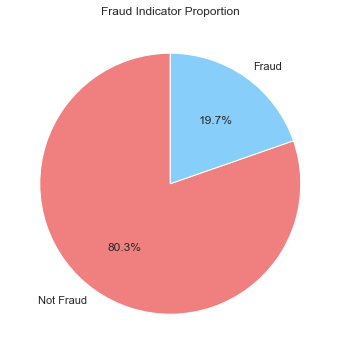

In [160]:
plt.figure(figsize=(12, 6))
fraud_counts = df['Fraud_indicator'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Fraud Indicator Proportion')
plt.show()

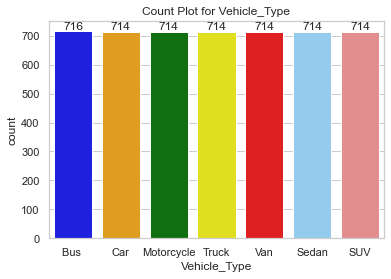

In [161]:
colors = ['blue', 'orange','green','yellow','red','lightskyblue','lightcoral'] 
ax = sns.countplot(x='Vehicle_Type',data=df, palette=colors)
plt.title('Count Plot for Vehicle_Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

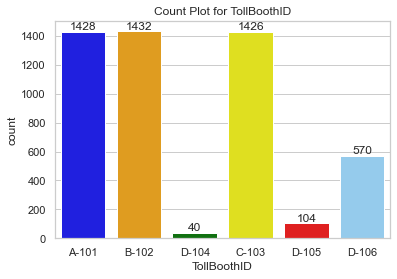

In [162]:
colors = ['blue', 'orange','green','yellow','red','lightskyblue','lightcoral'] 
ax = sns.countplot(x='TollBoothID', data=df, palette=colors)
plt.title('Count Plot for TollBoothID')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

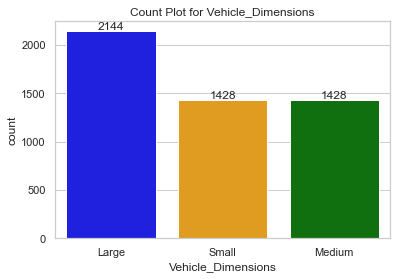

In [163]:
colors = ['blue', 'orange','green','yellow','red','lightskyblue','lightcoral'] 
ax = sns.countplot(x='Vehicle_Dimensions', data=df, palette=colors)
plt.title('Count Plot for Vehicle_Dimensions')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

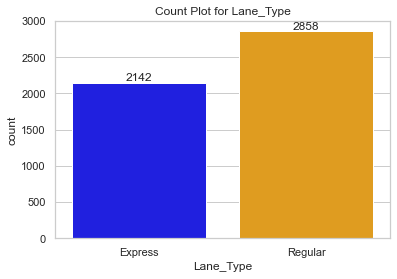

In [164]:
colors = ['blue', 'orange','green','yellow','red','lightskyblue','lightcoral'] 
ax = sns.countplot(x='Lane_Type', data=df, palette=colors)
plt.title('Count Plot for Lane_Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

Text(0.5, 1.0, 'Transaction_Amount')

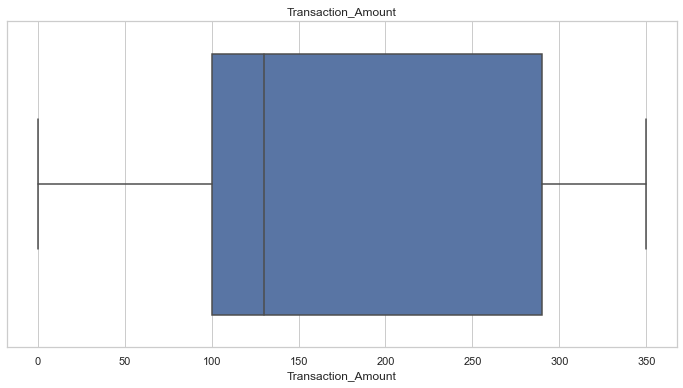

In [165]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Transaction_Amount',data = df)
plt.title('Transaction_Amount')


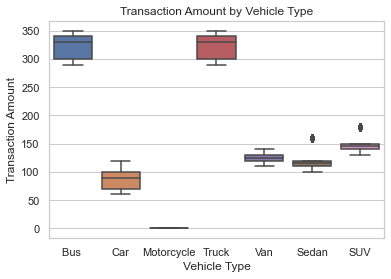

In [166]:
sns.boxplot(data=df, x='Vehicle_Type', y='Transaction_Amount')
plt.title('Transaction Amount by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Transaction Amount')
plt.show()

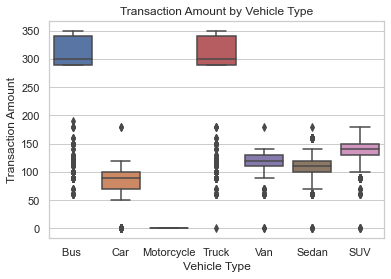

In [167]:
sns.boxplot(data=df, x='Vehicle_Type', y='Amount_paid')
plt.title('Transaction Amount by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Transaction Amount')
plt.show()

Text(0.5, 1.0, 'Amount_paid')

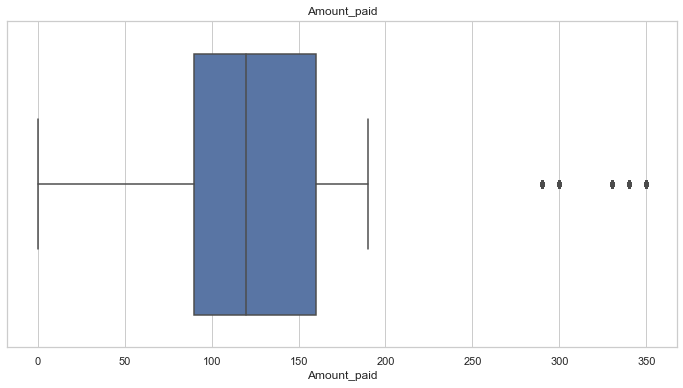

In [168]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Amount_paid',data = df)
plt.title('Amount_paid')

In [169]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [170]:
# Convert Timestamp to datetime with infer_datetime_format=True
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True, errors='coerce')


In [171]:
df['Hour'] = df['Timestamp'].dt.hour

In [172]:
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

In [173]:
df['Month'] = df['Timestamp'].dt.month_name()

In [174]:

df.head()

Transaction_ID           Timestamp Vehicle_Type         FastagID  \
0               1 2023-01-06 11:20:00         Bus   FTG-001-ABC-121   
1               2 2023-01-07 14:55:00          Car  FTG-002-XYZ-451   
2               3 2023-01-08 18:25:00   Motorcycle              NaN   
3               4 2023-01-09 02:05:00        Truck  FTG-044-LMN-322   
4               5 2023-01-10 06:35:00          Van  FTG-505-DEF-652   

  TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0       A-101   Express              Large                 350          120   
1       B-102   Regular              Small                 120          100   
2       D-104   Regular              Small                   0            0   
3       C-103   Regular              Large                 350          120   
4       B-102   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292             65           KA11AB1234   
1  13.059816123454882, 77.77068662374292             78           KA66CD5678   
2  13.059816123454882, 77.77068662374292             53           KA88EF9012   
3  13.059816123454882, 77.77068662374292             92           KA11GH3456   
4  13.059816123454882, 77.77068662374292             60           KA44IJ6789   

  Fraud_indicator  Hour DayOfWeek    Month  
0           Fraud    11    Friday  January  
1           Fraud    14  Saturday  January  
2       Not Fraud    18    Sunday  January  
3           Fraud     2    Monday  January  
4           Fraud     6   Tuesday  January

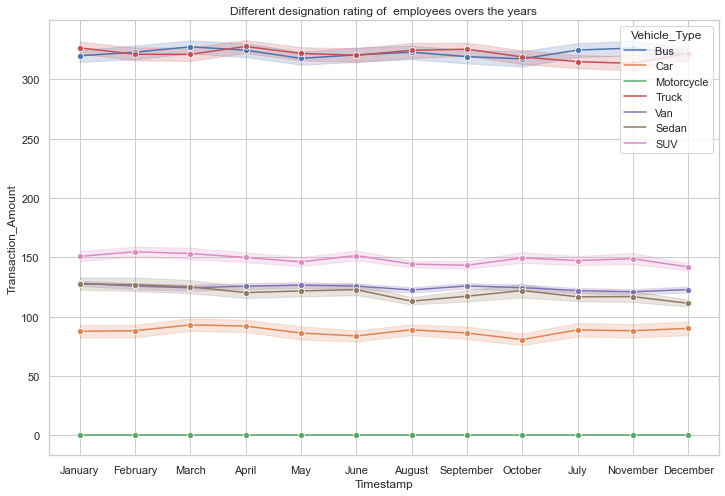

In [175]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = df['Timestamp'].dt.month_name(),y = 'Transaction_Amount',hue = df.Vehicle_Type, data = df,marker ='o' )
plt.title('Different designation rating of  employees overs the years')
plt.show()

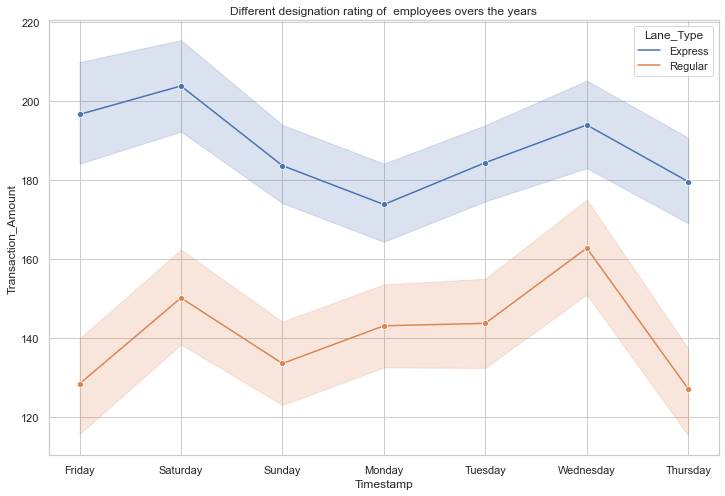

In [176]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = df['Timestamp'].dt.day_name(),y = 'Transaction_Amount',hue = df.Lane_Type, data = df,marker ='o' )
plt.title('Different designation rating of  employees overs the years')
plt.show()

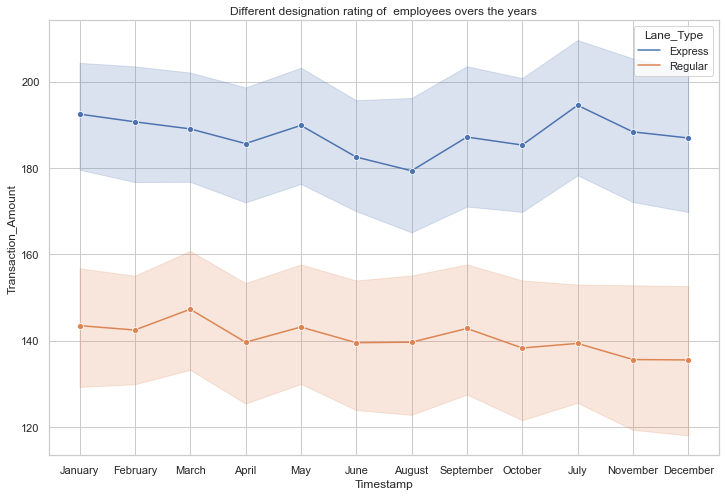

In [177]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = df['Timestamp'].dt.month_name(),y = 'Transaction_Amount',hue = df.Lane_Type, data = df,marker ='o' )
plt.title('Different designation rating of  employees overs the years')
plt.show()

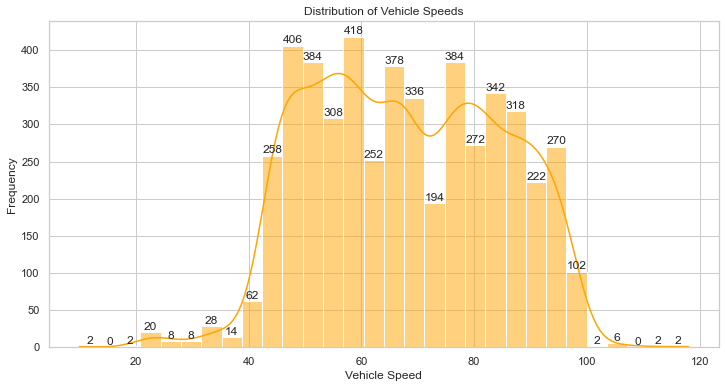

In [178]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Vehicle_Speed'], bins=30,color='orange', kde=True)
counts, bin_edges = np.histogram(df['Vehicle_Speed'], bins=30)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
for count, x in zip(counts, bin_centers):
    plt.text(x, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Distribution of Vehicle Speeds')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

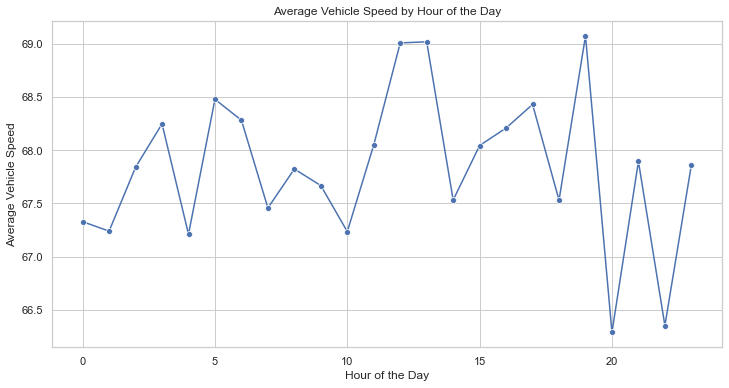

In [179]:
# Calculate average speed per hour
avg_speed_per_hour = df.groupby('Hour')['Vehicle_Speed'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Vehicle_Speed', data=avg_speed_per_hour, marker='o')
plt.title('Average Vehicle Speed by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Vehicle Speed')
plt.grid(True)
plt.show()

## Shows the average vehicle speed during different hours, which can highlight peak traffic times and potential anomalies in speed patterns at certain times.

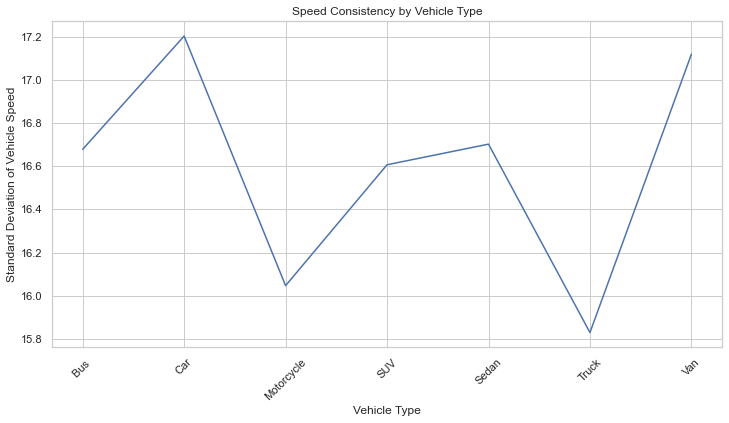

In [180]:
# Calculate speed consistency (standard deviation) per Vehicle_Type
speed_consistency = df.groupby('Vehicle_Type')['Vehicle_Speed'].std().reset_index()
speed_consistency.columns = ['Vehicle_Type', 'Speed_StdDev']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Vehicle_Type', y='Speed_StdDev', data=speed_consistency)
plt.title('Speed Consistency by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Standard Deviation of Vehicle Speed')
plt.xticks(rotation=45)
plt.show()

## Examines the variability of speeds for different vehicle types, indicating whether certain types of vehicles tend to maintain consistent speeds or vary widely.



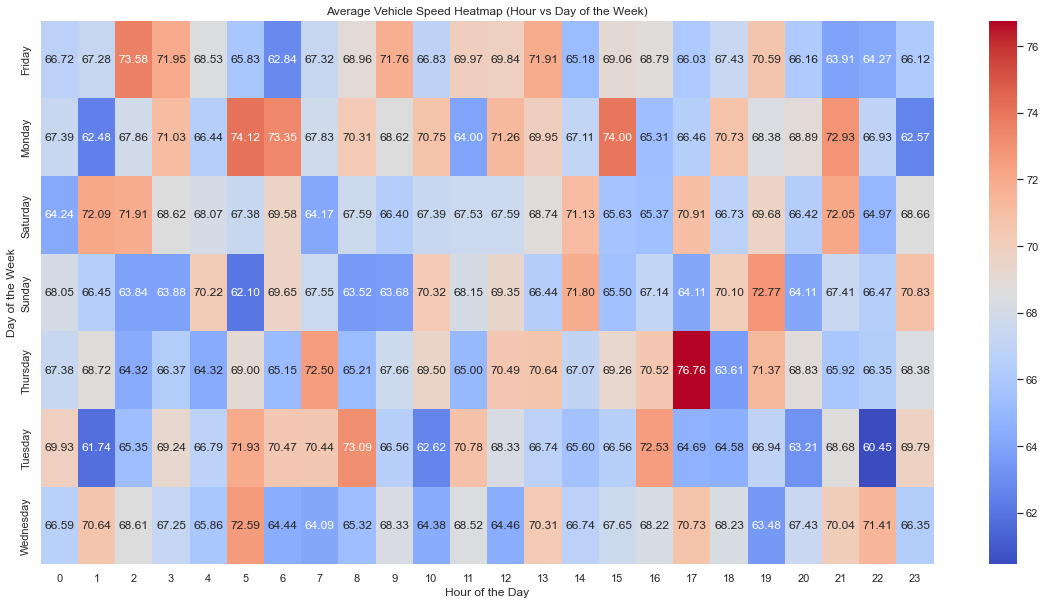

In [181]:
# Extract day of the week from Timestamp if not already done

df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# Pivot table for heatmap
speed_heatmap_data = df.pivot_table(values='Vehicle_Speed', index='DayOfWeek', columns='Hour', aggfunc='mean')

plt.figure(figsize=(20, 10))
sns.heatmap(speed_heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Average Vehicle Speed Heatmap (Hour vs Day of the Week)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

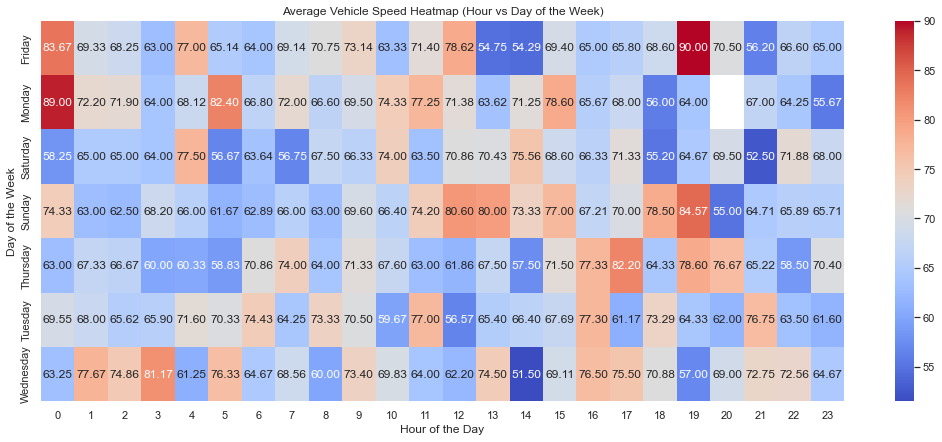

In [182]:

df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# Pivot table for heatmap
speed_heatmap_data = fraud_data.pivot_table(values='Vehicle_Speed', index='DayOfWeek', columns='Hour', aggfunc='mean')

plt.figure(figsize=(18, 7))
sns.heatmap(speed_heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Average Vehicle Speed Heatmap (Hour vs Day of the Week)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

## Visualizes how average speeds fluctuate across different hours and days, offering insights into daily and weekly traffic patterns.

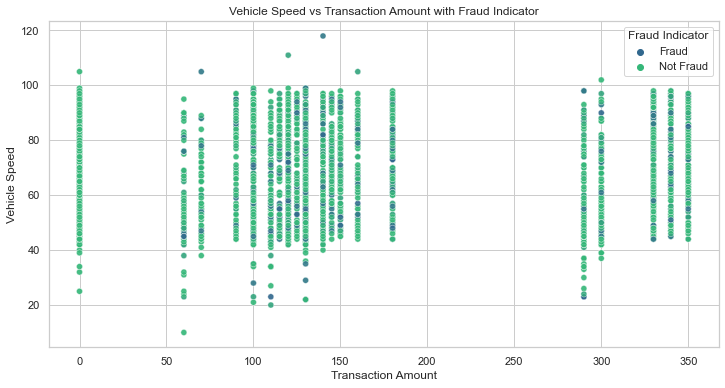

In [183]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Transaction_Amount', y='Vehicle_Speed', hue='Fraud_indicator', data=df, palette='viridis', alpha=0.7)
plt.title('Vehicle Speed vs Transaction Amount with Fraud Indicator')
plt.xlabel('Transaction Amount')
plt.ylabel('Vehicle Speed')
plt.legend(title='Fraud Indicator', loc='upper right')
plt.grid(True)
plt.show()

 ## Illustrates the relationship between speed and transaction amount, highlighting transactions flagged as fraud. This can help identify unusual combinations of speed and transaction amount associated with fraudulent activities.

In [184]:

df['Payment_Discrepancy'] = df['Transaction_Amount'] - df['Amount_paid']


In [185]:
df.head()

Transaction_ID           Timestamp Vehicle_Type         FastagID  \
0               1 2023-01-06 11:20:00         Bus   FTG-001-ABC-121   
1               2 2023-01-07 14:55:00          Car  FTG-002-XYZ-451   
2               3 2023-01-08 18:25:00   Motorcycle              NaN   
3               4 2023-01-09 02:05:00        Truck  FTG-044-LMN-322   
4               5 2023-01-10 06:35:00          Van  FTG-505-DEF-652   

  TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0       A-101   Express              Large                 350          120   
1       B-102   Regular              Small                 120          100   
2       D-104   Regular              Small                   0            0   
3       C-103   Regular              Large                 350          120   
4       B-102   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292             65           KA11AB1234   
1  13.059816123454882, 77.77068662374292             78           KA66CD5678   
2  13.059816123454882, 77.77068662374292             53           KA88EF9012   
3  13.059816123454882, 77.77068662374292             92           KA11GH3456   
4  13.059816123454882, 77.77068662374292             60           KA44IJ6789   

  Fraud_indicator  Hour DayOfWeek    Month  Payment_Discrepancy  
0           Fraud    11    Friday  January                  230  
1           Fraud    14  Saturday  January                   20  
2       Not Fraud    18    Sunday  January                    0  
3           Fraud     2    Monday  January                  230  
4           Fraud     6   Tuesday  January                   40

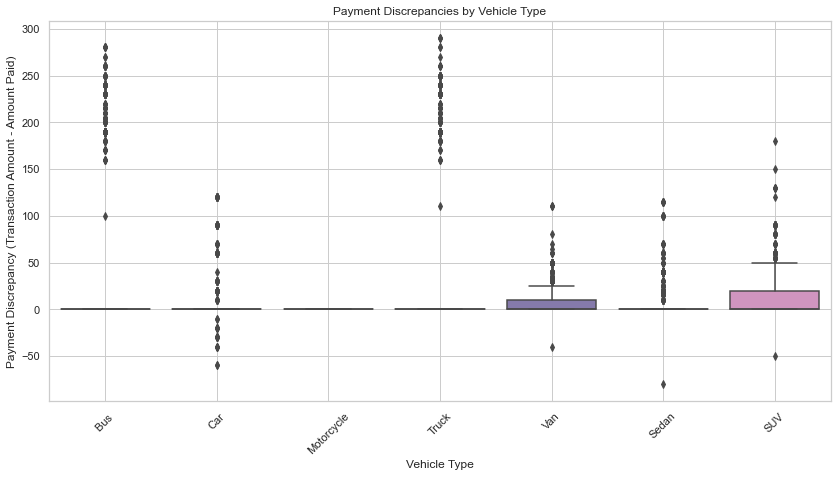

In [186]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Vehicle_Type', y='Payment_Discrepancy', data=df)
plt.title('Payment Discrepancies by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Payment Discrepancy (Transaction Amount - Amount Paid)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## By showing how payment discrepancies vary across different vehicle types, this plot can reveal whether certain types of vehicles are more prone to discrepancies.


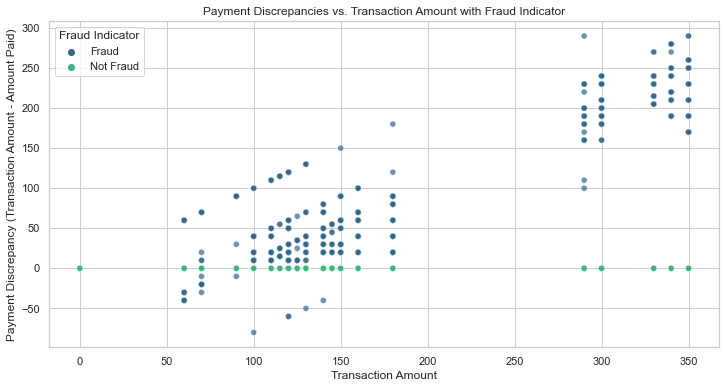

In [187]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Transaction_Amount', y='Payment_Discrepancy', hue='Fraud_indicator', data=df, palette='viridis', alpha=0.7)
plt.title('Payment Discrepancies vs. Transaction Amount with Fraud Indicator')
plt.xlabel('Transaction Amount')
plt.ylabel('Payment Discrepancy (Transaction Amount - Amount Paid)')
plt.legend(title='Fraud Indicator')
plt.grid(True)
plt.show()

## This scatter plot illustrates how discrepancies relate to the transaction amount and highlights potential fraudulent cases. It helps in identifying whether larger transactions are more prone to discrepancies.

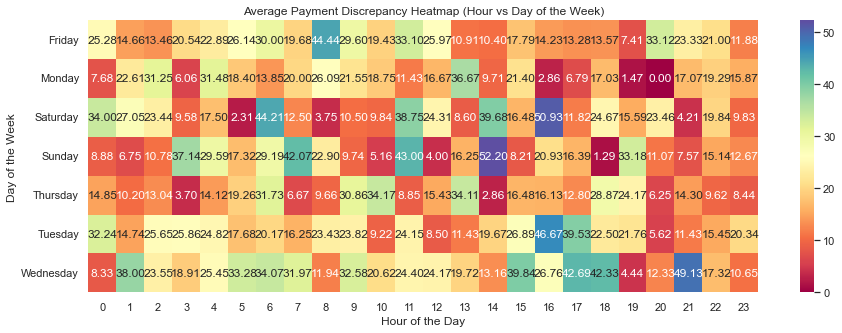

In [192]:
# Pivot table for heatmap
discrepancy_heatmap_data = df.pivot_table(values='Payment_Discrepancy', index='DayOfWeek', columns='Hour', aggfunc='mean')

plt.figure(figsize=(15, 5))
sns.heatmap(discrepancy_heatmap_data, cmap='Spectral', annot=True, fmt='.2f')
plt.title('Average Payment Discrepancy Heatmap (Hour vs Day of the Week)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

## This heatmap provides a detailed view of how average payment discrepancies change over different hours and days. It can reveal specific times when discrepancies are more common, potentially indicating operational or fraudulent issues.

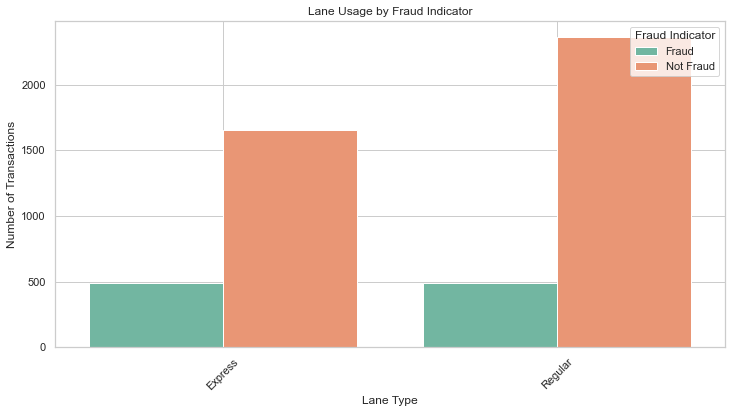

In [189]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df, palette='Set2')
plt.title('Lane Usage by Fraud Indicator')
plt.xlabel('Lane Type')
plt.ylabel('Number of Transactions')
plt.legend(title='Fraud Indicator', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

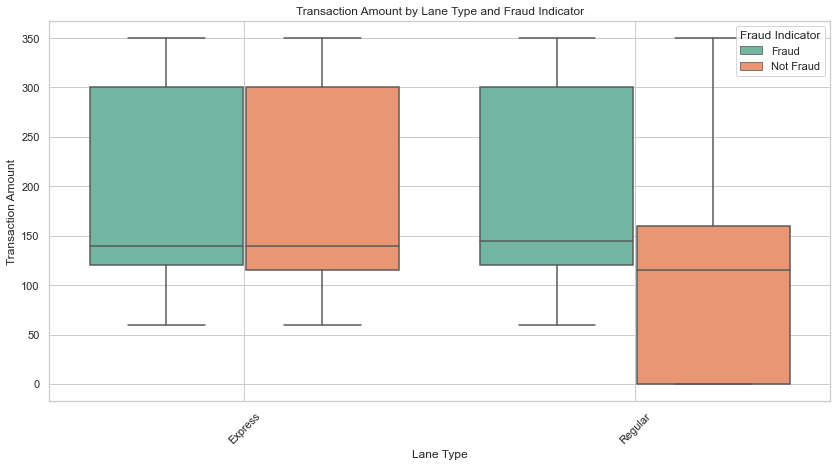

In [50]:

plt.figure(figsize=(14, 7))
sns.boxplot(x='Lane_Type', y='Transaction_Amount', hue='Fraud_indicator', data=df, palette='Set2')
plt.title('Transaction Amount by Lane Type and Fraud Indicator')
plt.xlabel('Lane Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud Indicator', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

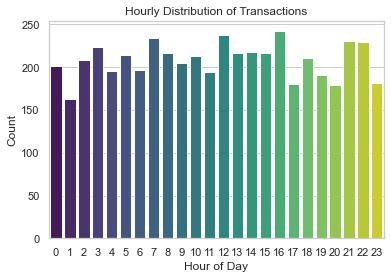

In [51]:


# Countplot for Hour
sns.countplot(data=df, x='Hour', palette='viridis')
plt.title('Hourly Distribution of Transactions')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

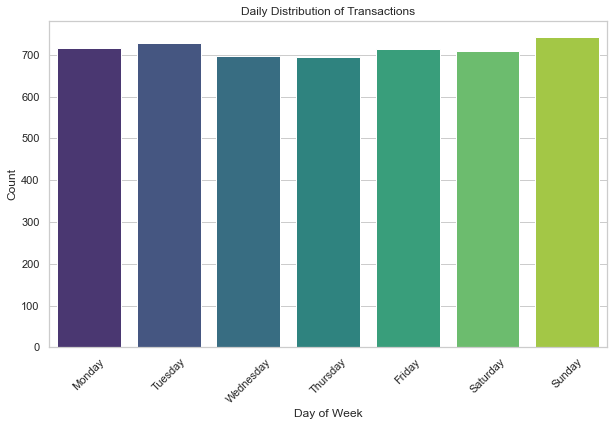

In [52]:
# Countplot for Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Distribution of Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

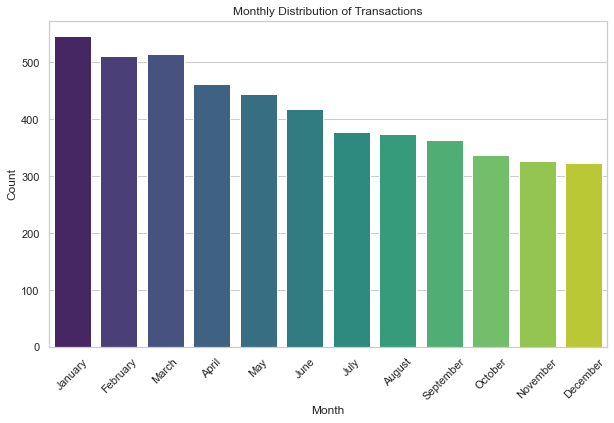

In [53]:
# Countplot for Month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Distribution of Transactions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

<Figure size 720x720 with 0 Axes>

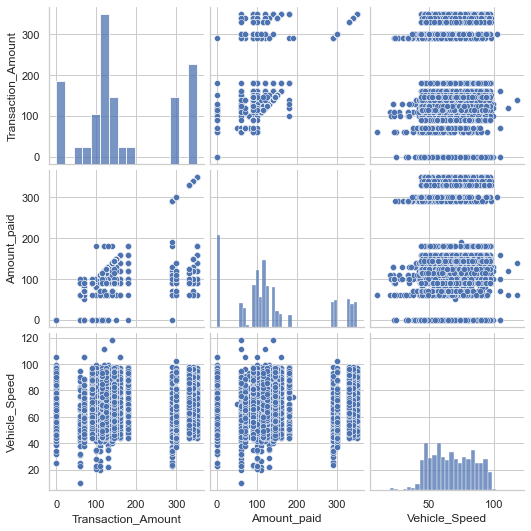

In [140]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

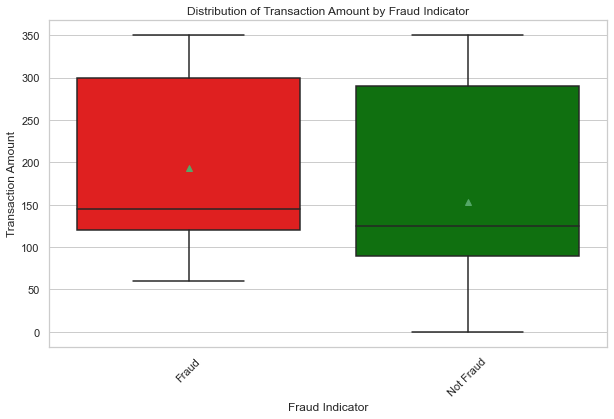

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x = "Fraud_indicator",
    y = "Transaction_Amount",
    showmeans=True,
    data=df,
    palette=["red", "green"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Transaction Amount")
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

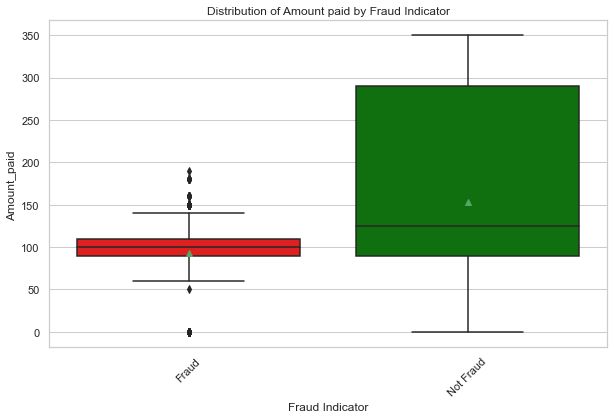

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x = "Fraud_indicator",
    y = "Amount_paid",
    showmeans=True,
    data=df,
    palette=["red", "green"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Amount_paid ")
plt.title("Distribution of Amount paid by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

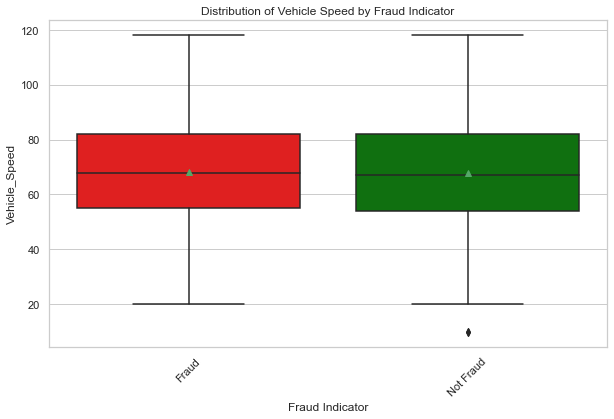

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x = "Fraud_indicator",
    y = "Vehicle_Speed",
    showmeans=True,
    data=df,
    palette=["red", "green"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Vehicle_Speed")
plt.title("Distribution of Vehicle Speed by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

In [58]:
fig = px.histogram(df, x='Hour', color='Fraud_indicator', title='Fraud Indicator by Hour')
fig.show()

fig = px.histogram(df, x='DayOfWeek', color='Fraud_indicator', title='Fraud Indicator by Day of Week')
fig.show()

fig = px.histogram(df, x='Month', color='Fraud_indicator', title='Fraud Indicator by Month')
fig.show()

In [59]:
fraud_data = df[df['Fraud_indicator']=='Fraud']

In [60]:
fraud_data.head()

Transaction_ID           Timestamp Vehicle_Type         FastagID  \
0               1 2023-01-06 11:20:00         Bus   FTG-001-ABC-121   
1               2 2023-01-07 14:55:00          Car  FTG-002-XYZ-451   
3               4 2023-01-09 02:05:00        Truck  FTG-044-LMN-322   
4               5 2023-01-10 06:35:00          Van  FTG-505-DEF-652   
5               6 2023-01-11 10:00:00        Sedan  FTG-066-GHI-987   

  TollBoothID Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0       A-101   Express              Large                 350          120   
1       B-102   Regular              Small                 120          100   
3       C-103   Regular              Large                 350          120   
4       B-102   Express             Medium                 140          100   
5       A-101   Regular             Medium                 160          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292             65           KA11AB1234   
1  13.059816123454882, 77.77068662374292             78           KA66CD5678   
3  13.059816123454882, 77.77068662374292             92           KA11GH3456   
4  13.059816123454882, 77.77068662374292             60           KA44IJ6789   
5  13.059816123454882, 77.77068662374292            105           KA77KL0123   

  Fraud_indicator  Hour  DayOfWeek    Month  Payment_Discrepancy  
0           Fraud    11     Friday  January                  230  
1           Fraud    14   Saturday  January                   20  
3           Fraud     2     Monday  January                  230  
4           Fraud     6    Tuesday  January                   40  
5           Fraud    10  Wednesday  January                   60

In [61]:
fraud_data['Vehicle_Type'].value_counts()

SUV      184
Van      181
Bus      177
Sedan    161
Truck    158
Car      122
Name: Vehicle_Type, dtype: int64

In [62]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator', 'Hour', 'DayOfWeek', 'Month',
       'Payment_Discrepancy'],
      dtype='object')

In [63]:
fraud_data['Vehicle_Dimensions'].value_counts()

Large     519
Medium    342
Small     122
Name: Vehicle_Dimensions, dtype: int64

In [64]:
fraud_data['Vehicle_Dimensions'].value_counts()

Large     519
Medium    342
Small     122
Name: Vehicle_Dimensions, dtype: int64

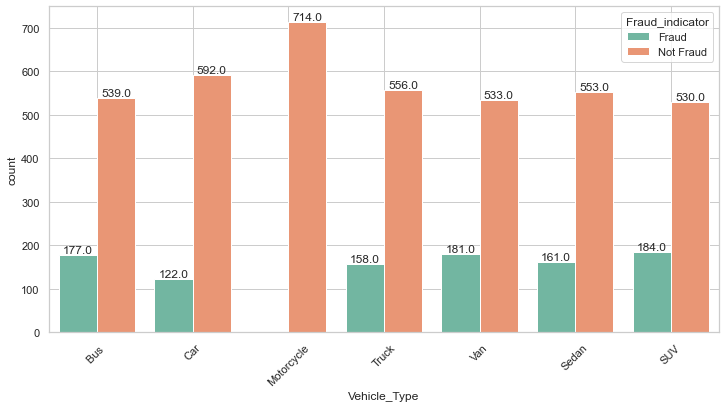

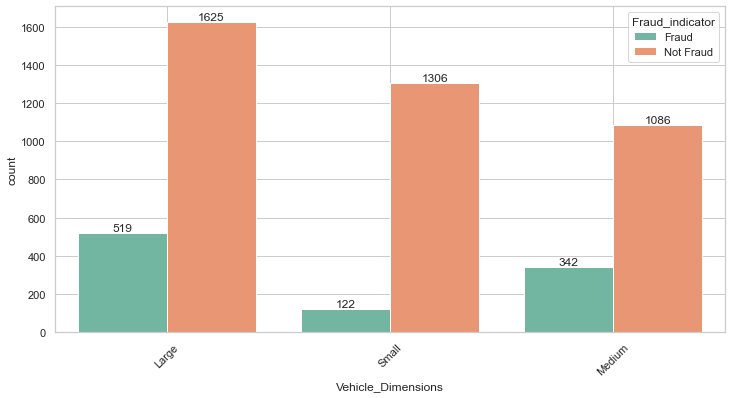

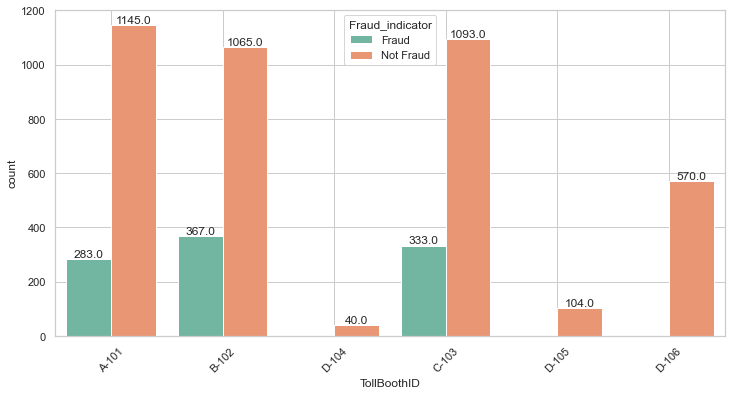

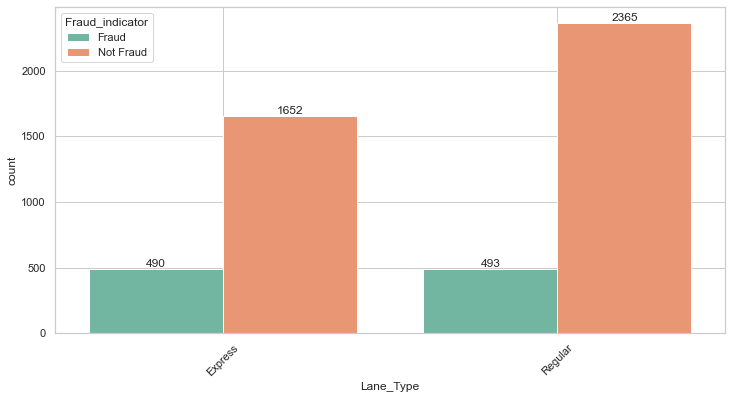

In [65]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 




plt.figure(figsize=(12, 6))
ax =sns.countplot(x='Vehicle_Dimensions', hue='Fraud_indicator', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 



plt.figure(figsize=(12, 6))
ax = sns.countplot(x='TollBoothID', hue='Fraud_indicator', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 



plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 



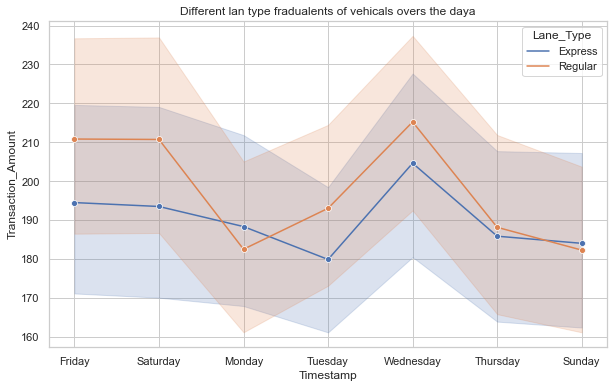

In [66]:
sns.set(style='whitegrid')
plt.figure(figsize = (10,6) )
sns.lineplot(x = fraud_data['Timestamp'].dt.day_name(),y = 'Transaction_Amount',hue = fraud_data.Lane_Type, data = fraud_data,marker ='o' )
plt.title('Different lan type fradualents of vehicals overs the daya')
plt.show()

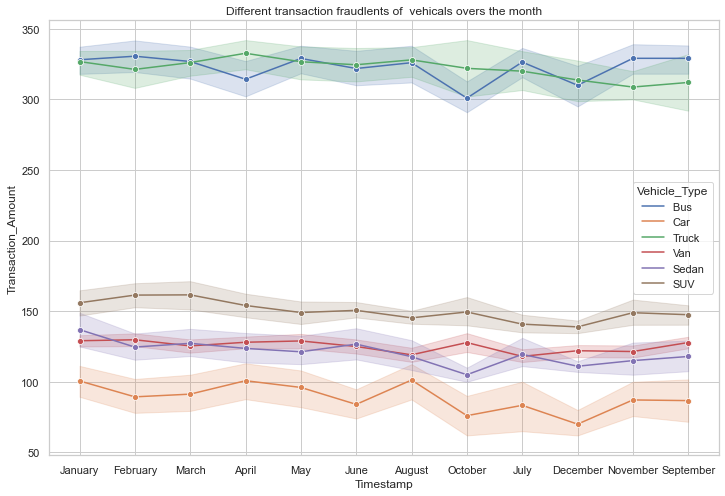

In [67]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = fraud_data['Timestamp'].dt.month_name(),y = 'Transaction_Amount',hue = fraud_data.Vehicle_Type, data = fraud_data,marker ='o' )
plt.title('Different transaction fraudlents of  vehicals overs the month')
plt.show()

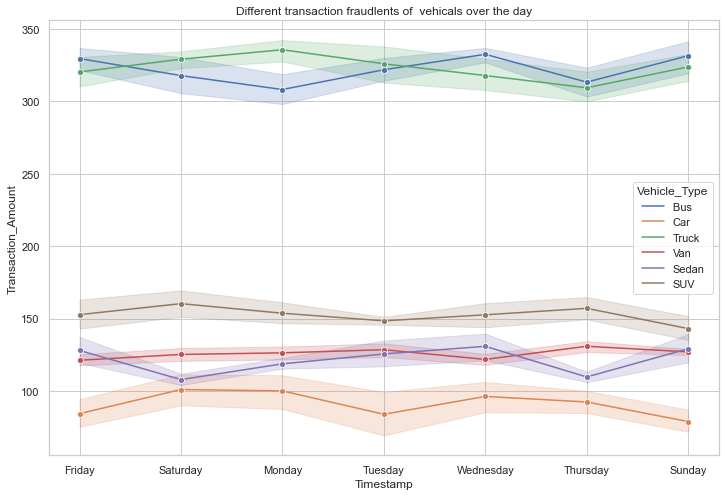

In [68]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = fraud_data['Timestamp'].dt.day_name(),y = 'Transaction_Amount',hue = fraud_data.Vehicle_Type, data = fraud_data,marker ='o' )
plt.title('Different transaction fraudlents of  vehicals over the day')
plt.show()

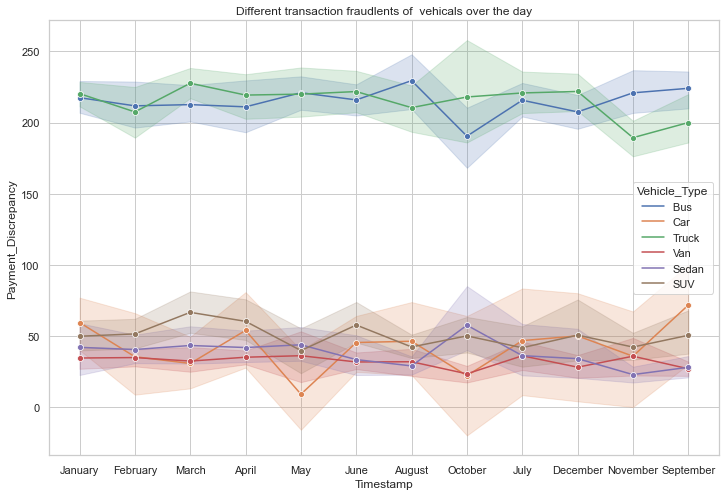

In [69]:
sns.set(style='whitegrid')
plt.figure(figsize = (12,8) )
sns.lineplot(x = fraud_data['Timestamp'].dt.month_name(),y = 'Payment_Discrepancy',hue = fraud_data.Vehicle_Type, data = fraud_data,marker ='o' )
plt.title('Different transaction fraudlents of  vehicals over the day')
plt.show()

In [70]:
fraud_data.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator', 'Hour', 'DayOfWeek', 'Month',
       'Payment_Discrepancy'],
      dtype='object')

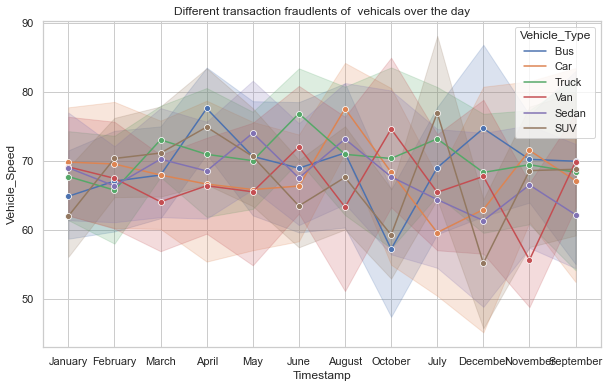

In [93]:
sns.set(style='whitegrid')
plt.figure(figsize = (10,6) )
sns.lineplot(x = fraud_data['Timestamp'].dt.month_name(),y = 'Vehicle_Speed',hue = fraud_data.Vehicle_Type, data = fraud_data,marker ='o' )
plt.title('Different transaction fraudlents of  vehicals over the day')
plt.show()

## Each line represents the trend of vehicle speeds for fraudulent transactions over the months. We can observe if there's a consistent increase or decrease in speeds.
## Peaks might indicate periods when fraudulent vehicles tend to travel faster, whereas troughs could suggest slower speeds during fraudulent transactions.

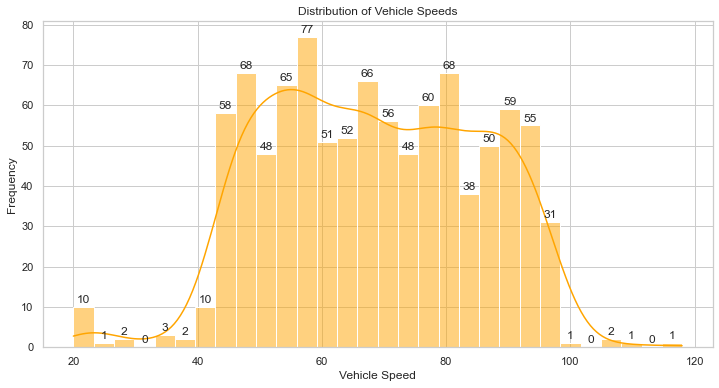

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(fraud_data['Vehicle_Speed'], bins=30,color='orange', kde=True)
counts, bin_edges = np.histogram(fraud_data['Vehicle_Speed'], bins=30)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
for count, x in zip(counts, bin_centers):
    plt.text(x, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Distribution of Vehicle Speeds')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()

### The highest frequency is observed in the 50-60 km/h range, with 77 vehicles. This indicates that the most common vehicle speed falls within this range.
### Another notable peak is in the 60-70 km/h range, with a frequency of 66 vehicles.
### Most vehicles are traveling within a specific range (40-80 km/h), with fewer vehicles at lower and higher speeds.


## Model Development

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
     

In [74]:
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions', 'DayOfWeek', 'Month'], drop_first=True)

     

In [75]:
df.head()

Transaction_ID           Timestamp         FastagID TollBoothID  \
0               1 2023-01-06 11:20:00  FTG-001-ABC-121       A-101   
1               2 2023-01-07 14:55:00  FTG-002-XYZ-451       B-102   
2               3 2023-01-08 18:25:00              NaN       D-104   
3               4 2023-01-09 02:05:00  FTG-044-LMN-322       C-103   
4               5 2023-01-10 06:35:00  FTG-505-DEF-652       B-102   

   Transaction_Amount  Amount_paid                  Geographical_Location  \
0            1.680364    -0.199689  13.059816123454882, 77.77068662374292   
1           -0.365195    -0.387535  13.059816123454882, 77.77068662374292   
2           -1.432443    -1.326764  13.059816123454882, 77.77068662374292   
3            1.680364    -0.199689  13.059816123454882, 77.77068662374292   
4           -0.187320    -0.387535  13.059816123454882, 77.77068662374292   

   Vehicle_Speed Vehicle_Plate_Number Fraud_indicator  ...  Month_December  \
0      -0.171802           KA11AB1234           Fraud  ...               0   
1       0.611525           KA66CD5678           Fraud  ...               0   
2      -0.894872           KA88EF9012       Not Fraud  ...               0   
3       1.455108           KA11GH3456           Fraud  ...               0   
4      -0.473081           KA44IJ6789           Fraud  ...               0   

   Month_February  Month_January  Month_July  Month_June  Month_March  \
0               0              1           0           0            0   
1               0              1           0           0            0   
2               0              1           0           0            0   
3               0              1           0           0            0   
4               0              1           0           0            0   

   Month_May  Month_November  Month_October  Month_September  
0          0               0              0                0  
1          0               0              0                0  
2          0               0              0                0  
3          0               0              0                0  
4          0               0              0                0  

[5 rows x 38 columns]

In [76]:
df['Fraud_indicator'] = df['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})


In [77]:

print(df.columns)

Index(['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID',
       'Transaction_Amount', 'Amount_paid', 'Geographical_Location',
       'Vehicle_Speed', 'Vehicle_Plate_Number', 'Fraud_indicator', 'Hour',
       'Payment_Discrepancy', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_SUV', 'Vehicle_Type_Sedan', 'Vehicle_Type_Truck',
       'Vehicle_Type_Van', 'Lane_Type_Regular', 'Vehicle_Dimensions_Medium',
       'Vehicle_Dimensions_Small', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September'],
      dtype='object')


In [78]:
print(df.dtypes)

Transaction_ID                        int64
Timestamp                    datetime64[ns]
FastagID                             object
TollBoothID                          object
Transaction_Amount                  float64
Amount_paid                         float64
Geographical_Location                object
Vehicle_Speed                       float64
Vehicle_Plate_Number                 object
Fraud_indicator                       int64
Hour                                  int64
Payment_Discrepancy                   int64
Vehicle_Type_Car                      uint8
Vehicle_Type_Motorcycle               uint8
Vehicle_Type_SUV                      uint8
Vehicle_Type_Sedan                    uint8
Vehicle_Type_Truck                    uint8
Vehicle_Type_Van                      uint8
Lane_Type_Regular                     uint8
Vehicle_Dimensions_Medium             uint8
Vehicle_Dimensions_Small              uint8
DayOfWeek_Monday                      uint8
DayOfWeek_Saturday              

In [79]:
# Convert uint8 columns to bool
bool_columns = [
    'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV', 'Vehicle_Type_Sedan',
    'Vehicle_Type_Truck', 'Vehicle_Type_Van', 'Lane_Type_Regular', 'Vehicle_Dimensions_Medium',
    'Vehicle_Dimensions_Small', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
    'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Month_August',
    'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June',
    'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September'
]

df[bool_columns] = df[bool_columns].astype(bool)


In [80]:
df.dtypes

Transaction_ID                        int64
Timestamp                    datetime64[ns]
FastagID                             object
TollBoothID                          object
Transaction_Amount                  float64
Amount_paid                         float64
Geographical_Location                object
Vehicle_Speed                       float64
Vehicle_Plate_Number                 object
Fraud_indicator                       int64
Hour                                  int64
Payment_Discrepancy                   int64
Vehicle_Type_Car                       bool
Vehicle_Type_Motorcycle                bool
Vehicle_Type_SUV                       bool
Vehicle_Type_Sedan                     bool
Vehicle_Type_Truck                     bool
Vehicle_Type_Van                       bool
Lane_Type_Regular                      bool
Vehicle_Dimensions_Medium              bool
Vehicle_Dimensions_Small               bool
DayOfWeek_Monday                       bool
DayOfWeek_Saturday              

In [81]:
# Drop unnecessary columns including 'Timestamp'
columns_to_drop = [
    'Timestamp', 'TollBoothID', 'Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Geographical_Location'
]
df = df.drop(columns=columns_to_drop, errors='ignore')


In [82]:
df.head()

Transaction_Amount  Amount_paid  Vehicle_Speed  Fraud_indicator  Hour  \
0            1.680364    -0.199689      -0.171802                1    11   
1           -0.365195    -0.387535       0.611525                1    14   
2           -1.432443    -1.326764      -0.894872                0    18   
3            1.680364    -0.199689       1.455108                1     2   
4           -0.187320    -0.387535      -0.473081                1     6   

   Payment_Discrepancy  Vehicle_Type_Car  Vehicle_Type_Motorcycle  \
0                  230             False                    False   
1                   20              True                    False   
2                    0             False                     True   
3                  230             False                    False   
4                   40             False                    False   

   Vehicle_Type_SUV  Vehicle_Type_Sedan  ...  Month_December  Month_February  \
0             False               False  ...           False           False   
1             False               False  ...           False           False   
2             False               False  ...           False           False   
3             False               False  ...           False           False   
4             False               False  ...           False           False   

   Month_January  Month_July  Month_June  Month_March  Month_May  \
0           True       False       False        False      False   
1           True       False       False        False      False   
2           True       False       False        False      False   
3           True       False       False        False      False   
4           True       False       False        False      False   

   Month_November  Month_October  Month_September  
0           False          False            False  
1           False          False            False  
2           False          False            False  
3           False          False            False  
4           False          False            False  

[5 rows x 32 columns]

In [83]:
columns_to_drop1 = [
    'Hour', 'Payment_Discrepancy',]
df = df.drop(columns=columns_to_drop1, errors='ignore')


In [84]:
df.head()

Transaction_Amount  Amount_paid  Vehicle_Speed  Fraud_indicator  \
0            1.680364    -0.199689      -0.171802                1   
1           -0.365195    -0.387535       0.611525                1   
2           -1.432443    -1.326764      -0.894872                0   
3            1.680364    -0.199689       1.455108                1   
4           -0.187320    -0.387535      -0.473081                1   

   Vehicle_Type_Car  Vehicle_Type_Motorcycle  Vehicle_Type_SUV  \
0             False                    False             False   
1              True                    False             False   
2             False                     True             False   
3             False                    False             False   
4             False                    False             False   

   Vehicle_Type_Sedan  Vehicle_Type_Truck  Vehicle_Type_Van  ...  \
0               False               False             False  ...   
1               False               False             False  ...   
2               False               False             False  ...   
3               False                True             False  ...   
4               False               False              True  ...   

   Month_December  Month_February  Month_January  Month_July  Month_June  \
0           False           False           True       False       False   
1           False           False           True       False       False   
2           False           False           True       False       False   
3           False           False           True       False       False   
4           False           False           True       False       False   

   Month_March  Month_May  Month_November  Month_October  Month_September  
0        False      False           False          False            False  
1        False      False           False          False            False  
2        False      False           False          False            False  
3        False      False           False          False            False  
4        False      False           False          False            False  

[5 rows x 30 columns]

In [85]:
df.shape

(5000, 30)

In [86]:
# Handling class imbalance using SMOTE
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

### Import required Library

In [87]:

!pip install numpy==1.25.2 scipy==1.11.4 scikit-learn==1.2.2 joblib

In [88]:
!pip install imblearn

In [89]:
# conda install -c conda-forge imbalanced-learn

^C

Note: you may need to restart the kernel to use updated packages.


In [90]:
# Import necessary libraries
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
# Create dummy data (replace with your actual data loading code)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
     

In [92]:
# Apply SMOTE to handle class imbalance
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

AttributeError: 'NoneType' object has no attribute 'split'

## Train the Model

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)



# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)
     

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_



# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Evaluate the Model

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
     
